In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [13]:
# Plot defaults
# Set font default
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = ['Dejavu Serif'] #'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00',
                    '#000000']
matplotlib.rcParams['mathtext.rm'] = 'stix'
matplotlib.rcParams['mathtext.it'] = 'stix'
matplotlib.rcParams['mathtext.bf'] = 'stix'


matplotlib.rcParams["axes.formatter.limits"] = (-99, 99) #makes scientific notation threshold high
plt.rcParams['font.family'] = 'Dejavu Serif'
plt.rcParams['font.serif'] = ['Times'] #['Times New Roman']  # 'DejaVu Serif' 'serif' 'Times

tickfontsize = 25
fontsize = 25
linewidth = 4
markersize = 15

SMALL_SIZE = tickfontsize
MEDIUM_SIZE = tickfontsize
BIGGER_SIZE = fontsize

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

shapes = ['o','s','^','D','*', 'x', 'P', 'h', 'v', '<', '>', 'X', 'd', 'p', '|', '_', '.', ',']



In [8]:
# Load data
original_data_path = '/groups/astuart/slanth/BoundFNO/models/trained_models/smooth_x_y_grid_subsampling_off.pt'
subsamp_data_path = '/groups/astuart/slanth/BoundFNO/models/trained_models/smooth_x_y_grid_subsampling_on.pt' 

original_data = torch.load(original_data_path,map_location=torch.device('cpu'))
subsamp_data = torch.load(subsamp_data_path,map_location=torch.device('cpu'))

# print keys
print(original_data.keys())


test_err_original = original_data['test_err']
test_err_subsamp = subsamp_data['test_err']
print(test_err_original.shape)
epochs = 300

timings_original = original_data['epoch_timings']
timings_subsamp = subsamp_data['epoch_timings']




dict_keys(['epochs: ', 'model_state_dict', 'optimizer_state_dict', 'train_err', 'test_err', 'valid_err', 'epoch_timings'])
torch.Size([300])


In [9]:
# Compute cumulative seconds
cumulative_seconds_original = np.cumsum(timings_original)
cumulative_seconds_subsamp = np.cumsum(timings_subsamp)

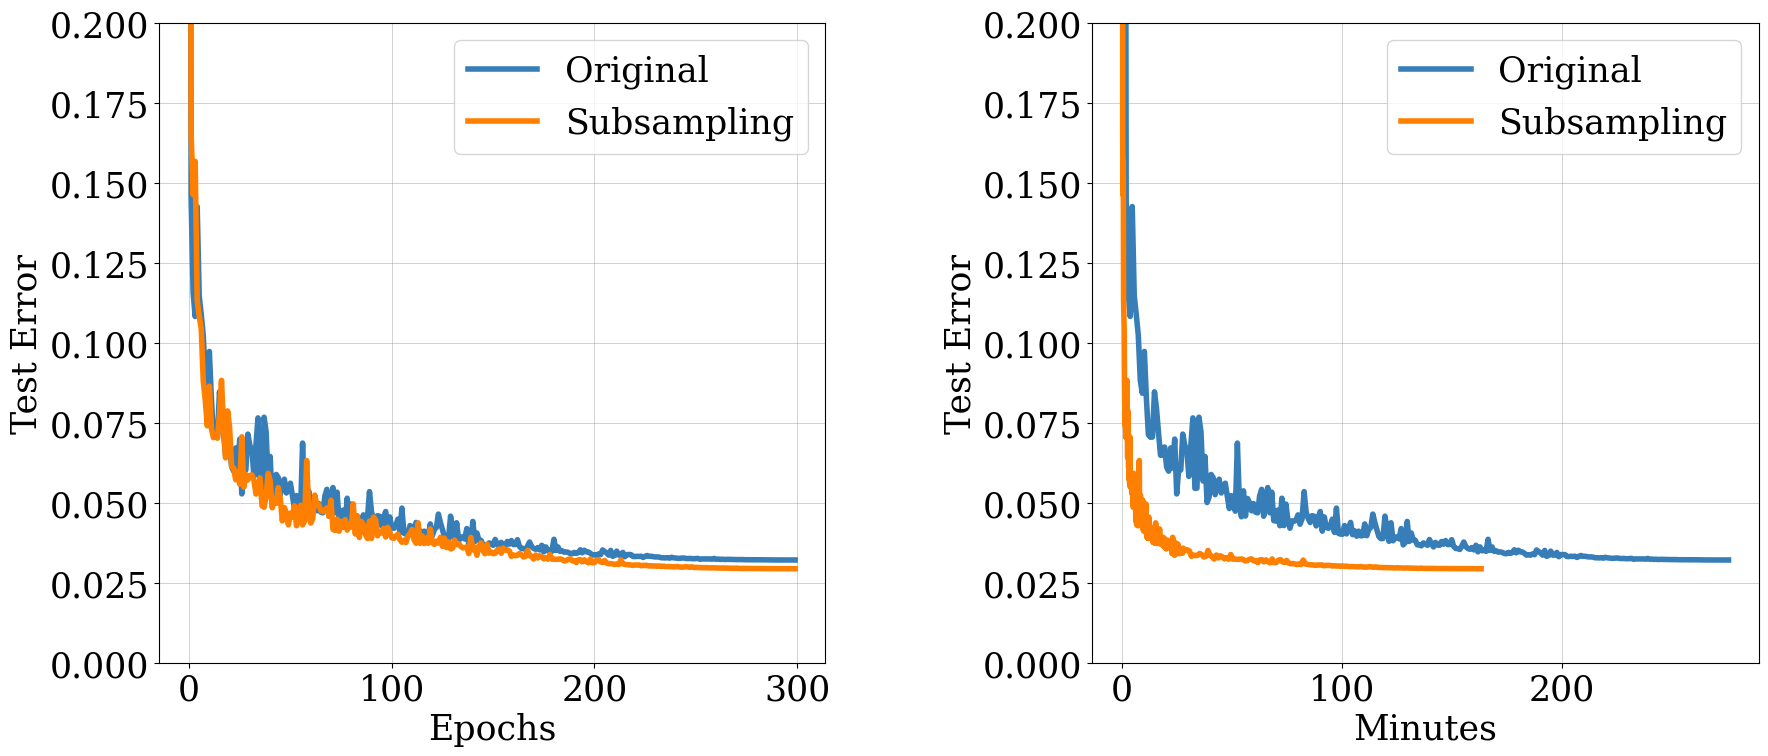

In [10]:
# Plot test error versus epoch and versus minutes
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].plot(np.arange(epochs), test_err_original, label='Original', linewidth=linewidth, color=CB_color_cycle[0])
ax[0].plot(np.arange(epochs), test_err_subsamp, label='Subsampling', linewidth=linewidth,  color=CB_color_cycle[1])

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Test Error')

ax[1].plot(cumulative_seconds_original/60, test_err_original, label='Original', linewidth=linewidth, color=CB_color_cycle[0])
ax[1].plot(cumulative_seconds_subsamp/60, test_err_subsamp, label='Subsampling', linewidth=linewidth, color=CB_color_cycle[1])
ax[1].set_xlabel('Minutes')
ax[1].set_ylabel('Test Error')

for i in range(2):
    ax[i].set_ylim([0,0.2])
    ax[i].grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax[i].legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('../Figures/test_error_vs_epoch_vs_time.pdf')
plt.show()

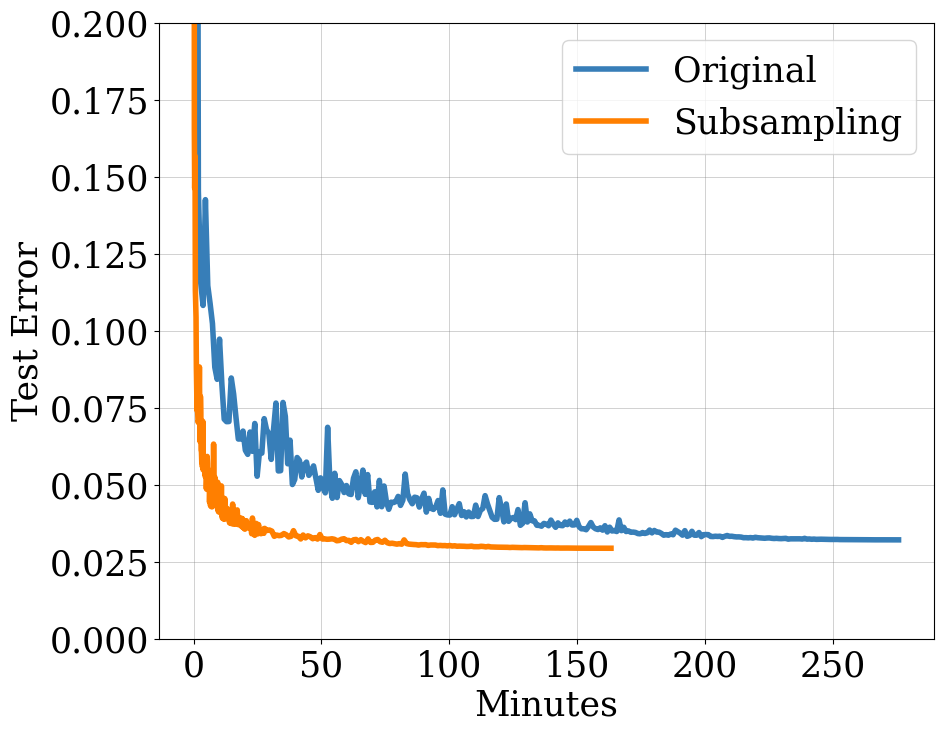

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(cumulative_seconds_original/60, test_err_original, label='Original', linewidth=linewidth, color=CB_color_cycle[0])
ax.plot(cumulative_seconds_subsamp/60, test_err_subsamp, label='Subsampling', linewidth=linewidth, color=CB_color_cycle[1])
ax.set_xlabel('Minutes')
ax.set_ylabel('Test Error')
ax.set_ylim([0,0.19])
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
ax.legend()

plt.savefig('../Figures/test_error_vs_minutes.pdf',bbox_inches='tight')
plt.show()